

<h2 align="center">Multiple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [5]:
data = pd.read_csv('Advertising.csv')

In [6]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


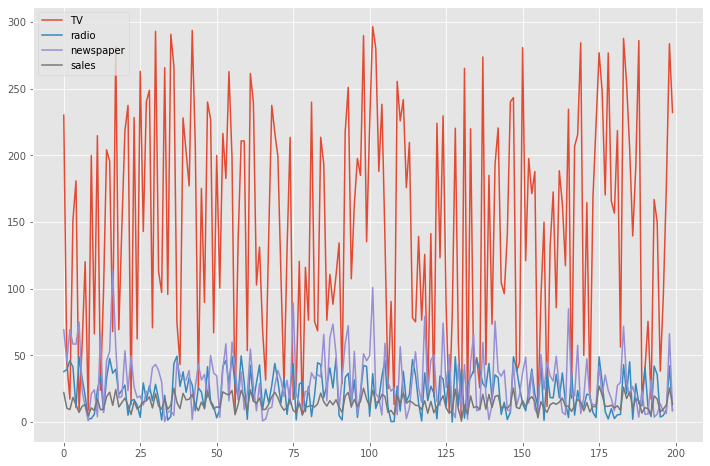

In [8]:
data.plot()

### Task 3: Relationship between Features and Response

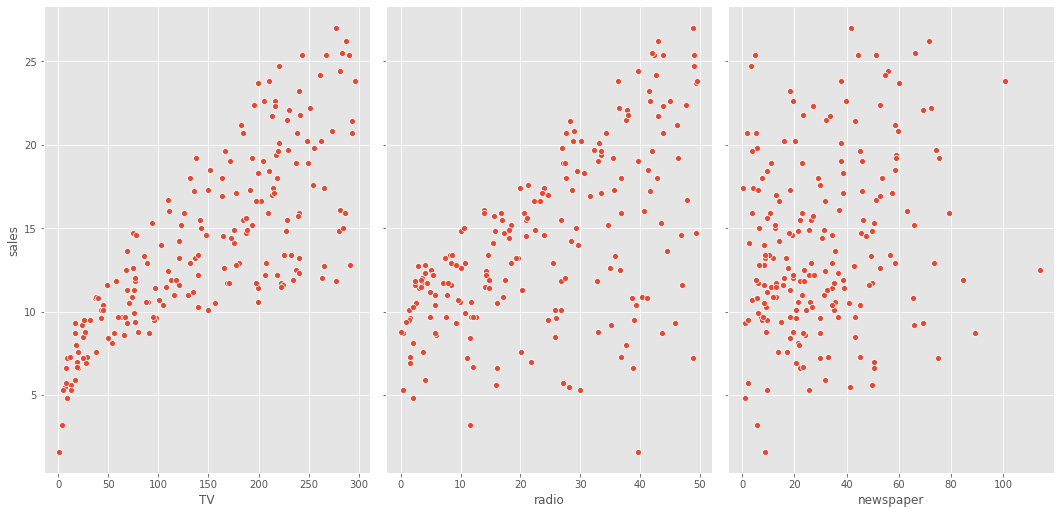

In [9]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales',height=7, aspect=0.7);

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [10]:
from sklearn.linear_model import LinearRegression

X= data[['TV','radio','newspaper']]
y= data.sales

lm1= LinearRegression()
lm1.fit(X,y)

print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [11]:
list(zip(['TV','radio','newspaper'], lm1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820442),
 ('newspaper', -0.0010374930424763285)]

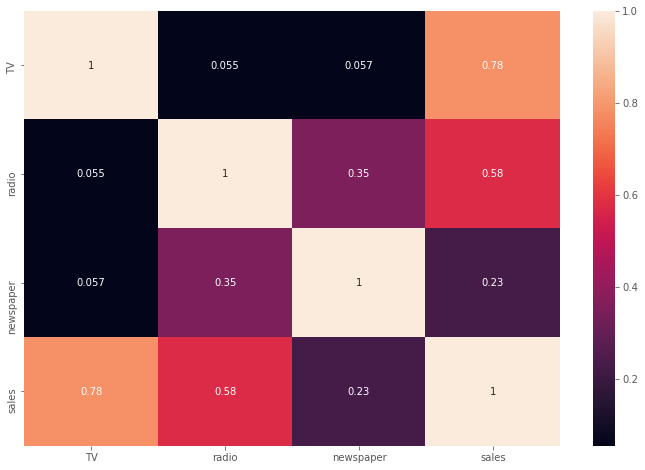

In [12]:
sns.heatmap(data.corr(), annot=True);

### Task 5: Feature Selection

In [13]:
from sklearn.metrics import r2_score
lm2= LinearRegression().fit(X[['TV','radio']],y)
lm2_preds= lm2.predict(X[['TV','radio']])

print("R^2: ",r2_score(y, lm2_preds))

R^2:  0.8971942610828956


In [14]:
lm3= LinearRegression().fit(X[['TV','radio','newspaper']],y)
lm3_preds = lm3.predict(X[['TV','radio','newspaper']])

print("R^2: ",r2_score(y, lm3_preds))

R^2:  0.8972106381789522


### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X= data[['TV','radio','newspaper']]
y= data.sales

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

lm4= LinearRegression().fit(X_train, y_train)
lm4_preds= lm4.predict(X_test)

print("RMSE: ",np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE:  1.404651423032896
R^2:  0.9156213613792231


In [16]:
X= data[['TV','radio']]
y= data.sales

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

lm5= LinearRegression().fit(X_train, y_train)
lm5_preds= lm5.predict(X_test)

print("RMSE: ",np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE:  1.387903469938289
R^2:  0.9176214942248907


In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lm5).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();

### Task 7: Interaction Effect (Synergy)

In [18]:
data['interaction'] = data['TV'] * data['radio']

X= data[['TV','radio','interaction']]
y= data.sales

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

lm6= LinearRegression().fit(X_train, y_train)
lm6_preds= lm4.predict(X_test)

print("RMSE: ",np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE:  16.61087879332728
R^2:  -10.799961916588874


In [ ]:
visualizer = PredictionError(lm6).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();